# **This is the regression model for corona virus dataset**

#The dataset needs to be sliced into smaller dataframes since the size is exceeding RAM

In [1]:
#importing librarries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set(style="darkgrid")

In [2]:
#generating the dataset
def generate_data(location:str,sample_number=10):
  data=pd.read_csv(location,engine='python')
  head=data.head()
  tail=data.tail()
  sample=data.sample(sample_number)
  description=data.describe()
  columns=data.columns
  info=data.info()
  shape=data.shape
  size=data.size
  return {'data':data,'head':head,'tail':tail,'sample':sample,'description':description,'columns':columns,'info':info,
          'shape':shape,'size':size}


In [3]:
data_set=generate_data('/content/covid_19_data.csv')
data=data_set['data']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [4]:
data.shape

(306429, 8)

#In this project will be predicting following:

#1)Confirmed cases

#2)Deaths

#3)Recovered patients

In [30]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [31]:
data.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


In [32]:
data.sample(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
42437,42438,06/14/2020,Madhya Pradesh,India,2021-04-02 15:13:53,10641.0,447.0,7377.0
67317,67318,07/18/2020,Jilin,Mainland China,2021-04-02 15:13:53,155.0,2.0,153.0
182651,182652,12/19/2020,NaN,Monaco,2021-04-02 15:13:53,723.0,3.0,616.0
27478,27479,05/20/2020,Sardegna,Italy,2021-04-02 15:13:53,1355.0,126.0,898.0
159835,159836,11/19/2020,Adygea Republic,Russia,2021-04-02 15:13:53,7134.0,60.0,5814.0
181450,181451,12/17/2020,Kurgan Oblast,Russia,2021-04-02 15:13:53,10503.0,133.0,9232.0
233937,233938,02/24/2021,Altai Republic,Russia,2021-04-02 15:13:53,16131.0,152.0,15725.0
182685,182686,12/19/2020,NaN,Singapore,2021-04-02 15:13:53,58403.0,29.0,58274.0
305471,305472,05/28/2021,Perm Krai,Russia,2021-05-29 04:20:41,57180.0,2406.0,51404.0
241620,241621,03/06/2021,Ayacucho,Peru,2021-04-02 15:13:53,19999.0,516.0,0.0


#EDA of the dataset

#This is the distribution of each of the feature usig plotly for an interactive plot

In [5]:
def showDistribution(country:str):
  print(country)
  Data=data[data['Country/Region'] == country]
  print('This is the covid data belonging the country you entered')
  display(Data)
  print('These are the distributions of the data ')
  figure, axis = plt.subplots(3, 2,constrained_layout = True)
  axis[0, 0].plot(Data['ObservationDate'],Data['Confirmed'])
  axis[0, 0].set_title("Confirmed cases")
  axis[0, 1].plot(Data['ObservationDate'],Data['Deaths'])
  axis[0, 0].set_title("Deaths")
  axis[1, 0].plot(Data['ObservationDate'],Data['Recovered'])
  axis[0, 0].set_title("Recovered")
  axis[1, 1].plot(Data['Confirmed'],Data['Deaths'])
  axis[0, 0].set_title("Confirmed VS Deaths")
  axis[2, 0].plot(Data['Confirmed'],Data['Recovered'])
  axis[0, 0].set_title("Confirmed VS Recovered")
  plt.subplot_tool()
  plt.show()

Canada
This is the covid data belonging the country you entered


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
223,224,01/26/2020,Ontario,Canada,1/26/20 16:00,1.0,0.0,0.0
271,272,01/27/2020,Ontario,Canada,1/27/20 23:59,1.0,0.0,0.0
324,325,01/28/2020,Ontario,Canada,1/28/20 23:00,1.0,0.0,0.0
325,326,01/28/2020,British Columbia,Canada,1/28/20 23:00,1.0,0.0,0.0
378,379,01/29/2020,Ontario,Canada,1/29/20 19:30,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306244,306245,05/29/2021,Prince Edward Island,Canada,2021-05-30 04:20:55,200.0,0.0,187.0
306255,306256,05/29/2021,Quebec,Canada,2021-05-30 04:20:55,369728.0,11125.0,354104.0
306262,306263,05/29/2021,Repatriated Travellers,Canada,2021-05-30 04:20:55,13.0,0.0,13.0
306295,306296,05/29/2021,Saskatchewan,Canada,2021-05-30 04:20:55,46464.0,537.0,44519.0


These are the distributions of the data 


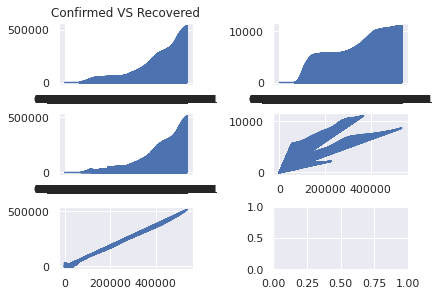

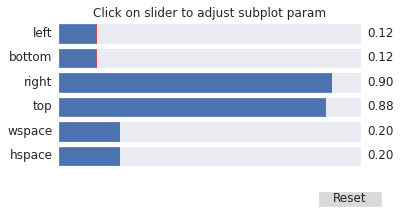

In [37]:
showDistribution('Canada')

In [6]:
def newData(country:str):
  Data=data[data['Country/Region'] == country]
  return Data


In [7]:
countryData=newData('Canada')
display(countryData)
#now working on this subset of the main data that belongs to a specific country/region

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
223,224,01/26/2020,Ontario,Canada,1/26/20 16:00,1.0,0.0,0.0
271,272,01/27/2020,Ontario,Canada,1/27/20 23:59,1.0,0.0,0.0
324,325,01/28/2020,Ontario,Canada,1/28/20 23:00,1.0,0.0,0.0
325,326,01/28/2020,British Columbia,Canada,1/28/20 23:00,1.0,0.0,0.0
378,379,01/29/2020,Ontario,Canada,1/29/20 19:30,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306244,306245,05/29/2021,Prince Edward Island,Canada,2021-05-30 04:20:55,200.0,0.0,187.0
306255,306256,05/29/2021,Quebec,Canada,2021-05-30 04:20:55,369728.0,11125.0,354104.0
306262,306263,05/29/2021,Repatriated Travellers,Canada,2021-05-30 04:20:55,13.0,0.0,13.0
306295,306296,05/29/2021,Saskatchewan,Canada,2021-05-30 04:20:55,46464.0,537.0,44519.0


#Now filtering the dataset based on the country you selected

#Animations

In [ ]:
#cases
px.scatter(countryData,x='ObservationDate',y='Confirmed',animation_frame='ObservationDate',animation_group='Province/State',
           size='Confirmed', color='Province/State',hover_name='Province/State',
           log_x=True, size_max=55)

In [ ]:
#deaths
px.scatter(countryData,x='ObservationDate',y='Deaths',animation_frame='ObservationDate',animation_group='Province/State',
           size='Deaths', color='Province/State',hover_name='Province/State',
           log_x=True, size_max=100000)

In [ ]:
#recovered
px.scatter(countryData,x='ObservationDate',y='Recovered',animation_frame='ObservationDate',animation_group='Province/State',
           size='Recovered', color='Province/State',hover_name='Province/State',
           log_x=True, size_max=100000)

In [ ]:
#confirmed vs deaths
px.scatter(countryData,x='Confirmed',y='Deaths',animation_frame='ObservationDate',animation_group='Province/State',
           size='Deaths', color='Province/State',hover_name='Province/State',
           log_x=True, size_max=100000,range_x=[0,10e6], range_y=[0,10e6])

In [ ]:
#confirmed vs recovered
px.scatter(countryData,x='Confirmed',y='Recovered',animation_frame='ObservationDate',animation_group='Province/State',
           size='Recovered', color='Province/State',hover_name='Province/State',
           log_x=True, size_max=100000,range_x=[0,10e6], range_y=[0,10e6])

In [8]:
def get_type(data):
  numeric=[]
  categorical=[]
  for col in data.columns:
    if data[f'{col}'].dtypes == 'object':
      categorical.append(col)
    else:
      numeric.append(col)
  return {'numeric':numeric,'categorical':categorical}

In [9]:
# check for null values and deal with them
# this function will take the type of process as well for both numeric and categorical data
def treat_null_values(data,numeric_type:str='mean'):
  types=get_type(data)
  numeric=types['numeric']
  categorical=types['categorical']
  if numeric_type == 'mean':
    for col in numeric:
      data[f'{col}']=data[f'{col}'].fillna(data[f'{col}'].mean())
  elif numeric_type == 'mode':
    for col in numeric:
      data[f'{col}']=data[f'{col}'].fillna(data[f'{col}'].mode())
  elif numeric_type == 'median':
    for col in numeric:
      data[f'{col}']=data[f'{col}'].fillna(data[f'{col}'].median())
  elif numeric_type == 'frequent':
    for col in numeric:
      data[f'{col}']=data[f'{col}'].fillna(data[f'{col}'].nunique[0])
  elif numeric_type == 'drop':
    for col in numeric:
      data[f'{col}']=data[f'{col}'].dropnna(inplace=True)
  elif numeric_type == 'predictive_modeling':
    pass # create a seprate function for this
  elif numeric_type == 'impute':
    pass # create a seprate function for this as well
  
  for col in categorical:
    most_frequent_category=data[f'{col}'].mode()[0]
    data[f'{col}'].fillna(most_frequent_category,inplace=True)
  return data

  

def predictive_modeling():
  pass #do a detailed study as disadvantages for this model usually outweights advantages
def multiple_imputation():
  from fancyimpute import IterativeImputer as MICE
  data= pd.DataFrame(MICE().fit_transform(data))
  return data

In [10]:
def encode_data(data,multiclass:str='One_hot',binary_class:str='Label'): #this function takes three args one is the data 2nd is the type of encoding for multiclass data and third is the encoding for binary class data
  categorical=get_type(data)['categorical']
  multivariate=[]
  bivariate=[]
  for col in categorical:
    if data[f'{col}'].nunique()>2:
      multivariate.append(col)
    else:
      bivariate.append(col)
  
  if multiclass == 'One_hot':
    for col in multivariate:
      data=encode_and_bind(data,col)
  if binary_class == 'Label':
    for col in bivariate:
      data=label_encode(data,col)
  # add other sorting techniques as well in here
  return data

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res.pop(feature_to_encode)
    return(res)

def label_encode(data,col):
  from sklearn.preprocessing import LabelEncoder
  encoder=LabelEncoder()
  data[col]=encoder.fit_transform(data[col])
  return data
  
# this function needs to be modified therefore add differenr sort of encoding techniques as well in this cll

In [11]:
def treat_outliers(data,feature:str,algo:str='IQR',z_threshold:int=3,add_feature=None,remove:bool=False,scatter:bool=False,feature_x=None,feature_y=None): # this function takes two arguments one is data and 2ns is the algorithm
  pass
  if scatter == True:
    px.scatter(data_px,x=feature_x,y=feature_y,hover_name='Country')
  else:
    if algo == 'IQR':
      outlier_index=Inter_quantile_range(data,feature)
    if algo == 'EEA': # elliptic envelope algo
      outlier_index=Elliptice_envelope_algo(data,feature,add_feature)
    if algo == 'ISF': # Isolate forest algo
      outlier_index=Isolate_forest_algo(data,feature)
    if algo == 'One_classSVM': # one class svm
      outlier_index=One_class_SVM(data,feature)
    if algo == 'LOF':
      outlier_index=Local_factor_outlier(data,feature)
    if algo == 'Z_score':
      outlier_index=Z_score_algo(data,feature,z_threshold)
    print(outlier_index)
    if remove == True:
      data=remove_outliers(outlier_index,data)
      return data
    else:
      return outlier_index
    


# in all these function display the index of outliers

def Local_factor_outlier(data,feature):
  import numpy as np 
  from sklearn.neighbors import LocalOutlierFactor
  X=data[[feature,data.columns.values[-1]]]
  lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                         metric='minkowski', contamination=0.04,
                         novelty=False, n_jobs=-1)
  pred = lof.fit_predict(X)
  outlier_index = np.where(pred==-1)
  return outlier_index

def One_class_SVM(data,feature): #this returns novelty I am guessing so fuck this method
  import numpy as np
  from sklearn.svm import OneClassSVM
  X=data[[feature,data.columns.values[-1]]]
  one_class_svm = OneClassSVM(kernel='rbf', degree=3, gamma='scale')
  new_data = np.array([[-4, 8.5]])# change these values as per your dataset
  one_class_svm.fit(X)
  pred = one_class_svm.predict(new_data)
  outlier_index = np.where(pred==-1)
  return outlier_index

def Isolate_forest_algo(data,feature):
  import numpy as np
  from sklearn.ensemble import IsolationForest
  from sklearn.decomposition import PCA
  from sklearn.preprocessing import StandardScaler
  X=data[[feature,data.columns.values[-1]]]
   # Returns 1 of inliers, -1 for outliers
  iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=1.0, 
                          bootstrap=False, n_jobs=-1, random_state=1)
  pred = iforest.fit_predict(X)
 # Extract outliers
  outlier_index = np.where(pred==-1)
  return outlier_index

def Elliptice_envelope_algo(data,feature,add_feature):
  import numpy as np
  from sklearn.covariance import EllipticEnvelope
  elpenv = EllipticEnvelope(contamination=0.025, 
                          random_state=1)
  X=data[[feature,add_feature]]
# Returns 1 of inliers, -1 for outliers
  pred = elpenv.fit_predict(X)

# Extract outliers
  outlier_index = np.where(pred==-1)
  return outlier_index

def Inter_quantile_range(data,feature):
  Q1 = np.percentile(data[f'{feature}'], 25, interpolation = 'midpoint') 
  Q2 = np.percentile(data[f'{feature}'], 50, interpolation = 'midpoint') 
  Q3 = np.percentile(data[f'{feature}'], 75, interpolation = 'midpoint') 
  IQR = Q3 - Q1 
  low_lim = Q1 - 1.5 * IQR
  up_lim = Q3 + 1.5 * IQR
  outlier_index=[]
  for val in data[f'{feature}']:
    if val > up_lim or val <low_lim:
      outlier_index.append(data.index[data[f'{feature}'] == val].values[0])
  return outlier_index
         
def Z_score_algo(data,feature,z_threshold):
  mean = np.mean(data[f'{feature}'])
  std = np.std(data[f'{feature}'])
  print('mean of the dataset is', mean)
  print('std. deviation is', std)
  outlier_index = []
  for val in data[f'{feature}']:
    z = (val-mean)/std
    if z > z_threshold:
      outlier_index.append(data.index[data[f'{feature}'] == val].values[0])
  return outlier_index
  


# this function will remove the outliers if removal is allowed
def remove_outliers(index,data):
  for row in index:
    data.drop([row])
    print(f'dropped value at index {row}')
  return data

      

# if remove is true remove outliers else if it is false just return the index of outliers
# this will function will be returning two datasets the original one and one in which all the outliers are removed



In [12]:
# this function will perform all the data preprocessing steps
# incase you want to use non default algos call these function seprately
def preprocess_data(data,feature:str):
  data=treat_null_values(data)
  data=encode_data(data)
  last_column = data[feature]
  data.drop(feature, inplace=True, axis=1)
  #dropping country since it will be same for all the entries
  data.drop('Country/Region',inplace=True,axis=1)
  data.insert(data.shape[1],feature,last_column)
  
  return data

# call outliers and balance function independentlu whenever you like and PS Fuck Roopa


In [13]:
#generating three new dataset for following features:
'''
confirmed cases
Deaths
Recovered
'''
print(countryData.columns)

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')


In [14]:
#THESE ARE THE THREE NEW DATASETS BASED ON THE THREE FEATURES THIS MODEL WILL BE PREDICTING
Cases=preprocess_data(countryData,'Confirmed')
Deaths=preprocess_data(countryData,'Deaths')
Recovered=preprocess_data(countryData,'Recovered')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [15]:
#CORELLATION BETWEEN DIFFERENT FEATURES
def create_heat_map(data):
  #correalation between varaibles
  plt.figure(figsize=(15, 12))
  heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
  heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
  # save heatmap as .png file
  # dpi - sets the resolution of the saved image in dots/inches
  # bbox_inches - when set to 'tight' - does not allow the labels to be cropped
  plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')# this will will also return two dataset one being the original one and second one will be the one in


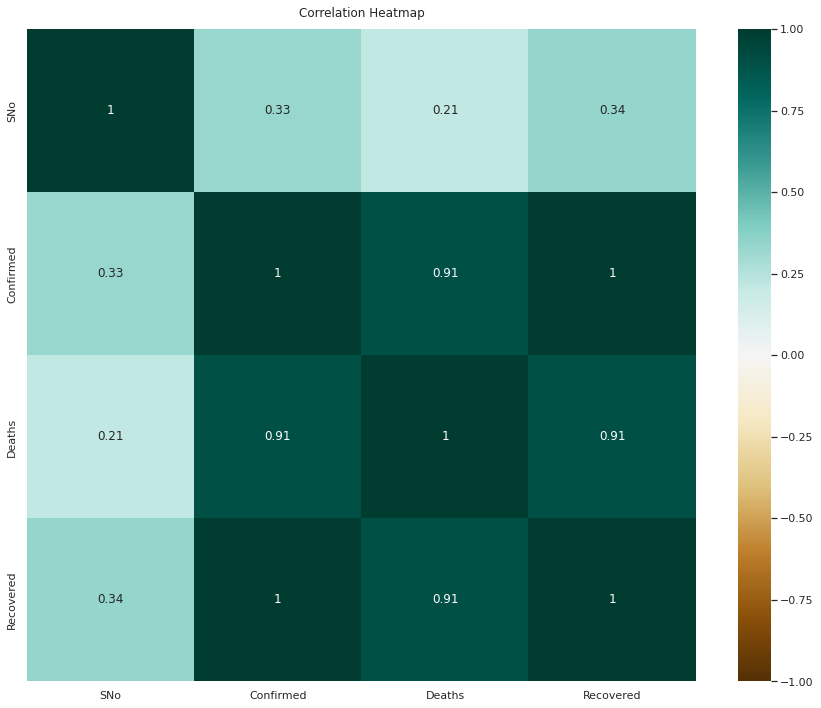

In [ ]:
create_heat_map(countryData)

#The greater corellation value between deaths and confimed cases then compared to confiremd cases and recovery should be a cause of concen.

#This is the EDA of teh new preprocessed data

In [16]:
Cases.describe()

,SNo,Deaths,Recovered,ObservationDate_01/01/2021,ObservationDate_01/02/2021,ObservationDate_01/03/2021,ObservationDate_01/04/2021,ObservationDate_01/05/2021,ObservationDate_01/06/2021,ObservationDate_01/07/2021,ObservationDate_01/08/2021,ObservationDate_01/09/2021,ObservationDate_01/10/2021,ObservationDate_01/11/2021,ObservationDate_01/12/2021,ObservationDate_01/13/2021,ObservationDate_01/14/2021,ObservationDate_01/15/2021,ObservationDate_01/16/2021,ObservationDate_01/17/2021,ObservationDate_01/18/2021,ObservationDate_01/19/2021,ObservationDate_01/20/2021,ObservationDate_01/21/2021,ObservationDate_01/22/2021,ObservationDate_01/23/2021,ObservationDate_01/24/2021,ObservationDate_01/25/2021,ObservationDate_01/26/2020,ObservationDate_01/26/2021,ObservationDate_01/27/2020,ObservationDate_01/27/2021,ObservationDate_01/28/2020,ObservationDate_01/28/2021,ObservationDate_01/29/2020,ObservationDate_01/29/2021,ObservationDate_01/30/2020,ObservationDate_01/30/2021,ObservationDate_01/31/2020,ObservationDate_01/31/2021,...,Last Update_2021-04-26 04:21:04,Last Update_2021-04-27 04:20:52,Last Update_2021-04-28 04:20:32,Last Update_2021-04-29 04:20:55,Last Update_2021-04-30 04:21:03,Last Update_2021-05-01 04:20:47,Last Update_2021-05-02 04:20:48,Last Update_2021-05-03 04:20:39,Last Update_2021-05-04 04:20:34,Last Update_2021-05-05 04:20:43,Last Update_2021-05-06 04:20:38,Last Update_2021-05-07 04:20:40,Last Update_2021-05-08 04:21:04,Last Update_2021-05-09 04:20:35,Last Update_2021-05-10 04:20:38,Last Update_2021-05-11 04:20:41,Last Update_2021-05-12 04:21:29,Last Update_2021-05-13 04:20:51,Last Update_2021-05-14 04:20:41,Last Update_2021-05-15 04:20:58,Last Update_2021-05-16 04:20:49,Last Update_2021-05-17 04:20:34,Last Update_2021-05-18 04:20:33,Last Update_2021-05-19 04:20:42,Last Update_2021-05-20 04:21:05,Last Update_2021-05-21 04:20:43,Last Update_2021-05-22 04:20:45,Last Update_2021-05-23 04:20:51,Last Update_2021-05-24 04:20:53,Last Update_2021-05-25 04:21:08,Last Update_2021-05-26 04:20:35,Last Update_2021-05-27 04:20:59,Last Update_2021-05-28 04:20:36,Last Update_2021-05-29 04:20:41,Last Update_2021-05-30 04:20:55,Last Update_3/8/20 5:31,Last Update_4/2/20 8:53,Last Update_4/4/20 9:38,Last Update_4/6/20 9:37,Confirmed
count,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,...,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000
mean,141273.261494,817.944828,24651.853879,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.000144,0.002299,0.000144,0.002299,0.000287,0.002299,0.000287,0.002299,0.000287,0.002299,0.000287,0.002299,...,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.008908,0.002299,0.002299,0.002299,27801.370259
std,93564.856224,2110.844169,68084.

In [ ]:
Deaths.describe()

,SNo,Confirmed,Recovered,ObservationDate_01/01/2021,ObservationDate_01/02/2021,ObservationDate_01/03/2021,ObservationDate_01/04/2021,ObservationDate_01/05/2021,ObservationDate_01/06/2021,ObservationDate_01/07/2021,ObservationDate_01/08/2021,ObservationDate_01/09/2021,ObservationDate_01/10/2021,ObservationDate_01/11/2021,ObservationDate_01/12/2021,ObservationDate_01/13/2021,ObservationDate_01/14/2021,ObservationDate_01/15/2021,ObservationDate_01/16/2021,ObservationDate_01/17/2021,ObservationDate_01/18/2021,ObservationDate_01/19/2021,ObservationDate_01/20/2021,ObservationDate_01/21/2021,ObservationDate_01/22/2021,ObservationDate_01/23/2021,ObservationDate_01/24/2021,ObservationDate_01/25/2021,ObservationDate_01/26/2021,ObservationDate_01/27/2021,ObservationDate_01/28/2021,ObservationDate_01/29/2021,ObservationDate_01/30/2020,ObservationDate_01/30/2021,ObservationDate_01/31/2020,ObservationDate_01/31/2021,ObservationDate_02/01/2020,ObservationDate_02/01/2021,ObservationDate_02/02/2020,ObservationDate_02/02/2021,...,Last Update_2021-04-26 04:21:04,Last Update_2021-04-27 04:20:52,Last Update_2021-04-28 04:20:32,Last Update_2021-04-29 04:20:55,Last Update_2021-04-30 04:21:03,Last Update_2021-05-01 04:20:47,Last Update_2021-05-02 04:20:48,Last Update_2021-05-03 04:20:39,Last Update_2021-05-04 04:20:34,Last Update_2021-05-05 04:20:43,Last Update_2021-05-06 04:20:38,Last Update_2021-05-07 04:20:40,Last Update_2021-05-08 04:21:04,Last Update_2021-05-09 04:20:35,Last Update_2021-05-10 04:20:38,Last Update_2021-05-11 04:20:41,Last Update_2021-05-12 04:21:29,Last Update_2021-05-13 04:20:51,Last Update_2021-05-14 04:20:41,Last Update_2021-05-15 04:20:58,Last Update_2021-05-16 04:20:49,Last Update_2021-05-17 04:20:34,Last Update_2021-05-18 04:20:33,Last Update_2021-05-19 04:20:42,Last Update_2021-05-20 04:21:05,Last Update_2021-05-21 04:20:43,Last Update_2021-05-22 04:20:45,Last Update_2021-05-23 04:20:51,Last Update_2021-05-24 04:20:53,Last Update_2021-05-25 04:21:08,Last Update_2021-05-26 04:20:35,Last Update_2021-05-27 04:20:59,Last Update_2021-05-28 04:20:36,Last Update_2021-05-29 04:20:41,Last Update_2021-05-30 04:20:55,Last Update_3/8/20 5:31,Last Update_4/2/20 8:53,Last Update_4/4/20 9:38,Last Update_4/6/20 9:37,Deaths
count,13182.000000,1.318200e+04,1.318200e+04,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,...,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000
mean,170632.240404,2.447859e+05,2.200417e+05,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.000076,0.002807,0.000076,0.002807,0.000076,0.002807,0.000076,0.002807,...,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.

In [ ]:
Recovered.describe()

,SNo,Confirmed,Deaths,ObservationDate_01/01/2021,ObservationDate_01/02/2021,ObservationDate_01/03/2021,ObservationDate_01/04/2021,ObservationDate_01/05/2021,ObservationDate_01/06/2021,ObservationDate_01/07/2021,ObservationDate_01/08/2021,ObservationDate_01/09/2021,ObservationDate_01/10/2021,ObservationDate_01/11/2021,ObservationDate_01/12/2021,ObservationDate_01/13/2021,ObservationDate_01/14/2021,ObservationDate_01/15/2021,ObservationDate_01/16/2021,ObservationDate_01/17/2021,ObservationDate_01/18/2021,ObservationDate_01/19/2021,ObservationDate_01/20/2021,ObservationDate_01/21/2021,ObservationDate_01/22/2021,ObservationDate_01/23/2021,ObservationDate_01/24/2021,ObservationDate_01/25/2021,ObservationDate_01/26/2021,ObservationDate_01/27/2021,ObservationDate_01/28/2021,ObservationDate_01/29/2021,ObservationDate_01/30/2020,ObservationDate_01/30/2021,ObservationDate_01/31/2020,ObservationDate_01/31/2021,ObservationDate_02/01/2020,ObservationDate_02/01/2021,ObservationDate_02/02/2020,ObservationDate_02/02/2021,...,Last Update_2021-04-26 04:21:04,Last Update_2021-04-27 04:20:52,Last Update_2021-04-28 04:20:32,Last Update_2021-04-29 04:20:55,Last Update_2021-04-30 04:21:03,Last Update_2021-05-01 04:20:47,Last Update_2021-05-02 04:20:48,Last Update_2021-05-03 04:20:39,Last Update_2021-05-04 04:20:34,Last Update_2021-05-05 04:20:43,Last Update_2021-05-06 04:20:38,Last Update_2021-05-07 04:20:40,Last Update_2021-05-08 04:21:04,Last Update_2021-05-09 04:20:35,Last Update_2021-05-10 04:20:38,Last Update_2021-05-11 04:20:41,Last Update_2021-05-12 04:21:29,Last Update_2021-05-13 04:20:51,Last Update_2021-05-14 04:20:41,Last Update_2021-05-15 04:20:58,Last Update_2021-05-16 04:20:49,Last Update_2021-05-17 04:20:34,Last Update_2021-05-18 04:20:33,Last Update_2021-05-19 04:20:42,Last Update_2021-05-20 04:21:05,Last Update_2021-05-21 04:20:43,Last Update_2021-05-22 04:20:45,Last Update_2021-05-23 04:20:51,Last Update_2021-05-24 04:20:53,Last Update_2021-05-25 04:21:08,Last Update_2021-05-26 04:20:35,Last Update_2021-05-27 04:20:59,Last Update_2021-05-28 04:20:36,Last Update_2021-05-29 04:20:41,Last Update_2021-05-30 04:20:55,Last Update_3/8/20 5:31,Last Update_4/2/20 8:53,Last Update_4/4/20 9:38,Last Update_4/6/20 9:37,Recovered
count,13182.000000,1.318200e+04,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,...,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,1.318200e+04
mean,170632.240404,2.447859e+05,3370.104916,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.000076,0.002807,0.000076,0.002807,0.000076,0.002807,0.000076,0.002807,...,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,0.0

In [ ]:
#Checking the new data for outliers before scaling it
#A)Visualizing it using the scatter plot
px.scatter(Cases,y='Confirmed')

In [ ]:
px.scatter(Cases,y='Deaths')

In [ ]:
px.scatter(Cases,y='Recovered')

In [17]:
#using statistical methods for finding outliers confirmed cases
outliers1=treat_outliers(Cases,feature='Confirmed')

[19846, 20171, 20498, 20825, 21152, 21479, 21806, 22133, 22460, 22787, 23114, 23441, 23768, 24095, 24422, 24750, 25119, 25500, 25881, 26262, 26643, 27024, 27439, 27456, 27895, 27912, 28351, 28368, 28807, 28824, 29263, 29280, 29719, 29736, 30175, 30192, 30631, 30648, 31154, 31177, 31712, 31735, 32270, 32293, 32829, 32852, 33454, 33484, 34121, 34151, 34789, 34819, 35457, 35487, 36134, 36166, 36822, 36854, 37510, 37542, 38199, 38231, 38887, 38919, 39603, 39638, 40333, 40368, 41066, 41101, 41799, 41834, 42532, 42567, 43265, 43300, 43998, 44033, 44731, 44766, 45464, 45499, 46197, 46232, 46930, 46965, 47663, 47698, 48396, 48431, 49129, 49164, 49862, 49897, 50595, 50630, 51328, 50630, 52061, 50630, 52794, 50630, 53527, 53562, 54260, 54295, 54993, 55028, 55726, 55761, 56459, 56494, 57192, 57227, 57925, 57960, 58658, 58693, 59391, 59426, 60124, 60159, 60857, 60892, 61590, 61625, 62323, 62358, 63056, 63091, 63789, 63824, 64522, 64557, 65255, 65290, 65988, 66023, 66728, 66764, 67474, 67510, 68220

In [ ]:
outliers2=treat_outliers(Cases,feature='Deaths')

[54904, 55637, 56370, 57103, 57836, 58569, 59302, 60035, 60768, 61501, 62234, 62967, 63700, 64433, 65166, 65899, 66637, 67383, 68129, 68875, 69621, 70367, 71113, 71859, 72605, 73351, 74097, 74097, 75591, 76338, 77085, 77832, 78579, 79326, 80073, 80820, 81567, 82314, 83061, 83808, 84555, 85302, 86048, 86794, 87540, 88286, 89032, 89778, 90524, 91270, 92016, 92762, 93508, 94254, 95000, 95746, 96492, 97238, 97984, 98730, 99476, 100222, 100968, 101714, 102460, 103206, 103952, 104698, 105444, 106190, 106391, 106936, 107137, 107682, 107883, 108428, 108629, 109174, 109375, 109920, 110121, 109920, 110121, 111412, 111613, 112158, 112359, 112904, 113105, 113650, 113851, 114396, 114597, 115090, 115142, 115343, 115836, 115888, 116089, 116583, 116635, 116836, 117330, 117382, 117583, 118077, 118129, 118330, 118824, 118876, 119077, 119571, 119623, 119824, 120318, 120370, 120571, 121065, 121117, 121318, 121812, 121864, 122065, 122559, 122611, 122812, 123306, 123358, 123559, 124053, 124105, 124306, 1248

In [ ]:
outliers3=treat_outliers(Cases,feature='Recovered')

[104698, 105444, 106190, 106936, 107682, 108428, 109174, 109920, 109920, 111412, 112158, 112904, 113650, 114396, 115142, 115888, 116635, 117382, 118129, 118876, 119623, 120370, 121117, 121864, 122611, 123358, 123842, 124105, 124589, 124852, 125336, 125599, 126083, 126346, 126830, 127093, 127577, 127840, 128324, 128587, 129071, 129334, 129818, 130081, 130565, 130828, 131313, 131576, 132061, 132324, 132809, 133072, 133557, 133820, 134305, 134568, 135053, 135316, 135801, 136012, 136064, 136549, 136760, 136812, 137297, 137508, 137560, 137761, 138045, 138256, 138308, 138509, 138793, 139004, 139056, 139257, 139541, 139752, 139804, 140005, 140289, 140500, 140552, 140753, 141037, 141248, 141300, 141501, 141785, 141996, 142048, 142249, 142533, 142744, 142796, 142997, 143282, 143493, 143545, 143746, 144031, 144242, 144294, 144495, 144780, 144991, 145043, 145244, 145529, 145740, 145792, 145993, 146278, 146489, 146541, 146742, 147027, 147238, 147290, 147491, 147776, 147987, 148039, 148240, 148525,

In [ ]:
print(f'Number of outliers {len(outliers1)}')
print(f'Number of outliers {len(outliers2)}')
print(f'Number of outliers {len(outliers3)}')
#since there are uneven distriubtion of number of cases in different countries 
#therefore there will be outliers present in the dataset.

Number of outliers 1431
Number of outliers 1540
Number of outliers 1332


#Splitting the data into test and train data

In [18]:
def split_data(data,dependent_feature:str=data.columns[-1],test_data_percentage=0.25,random_state=42):
  last_column = data[dependent_feature]
  data.drop(dependent_feature, inplace=True, axis=1)
  data.insert(data.shape[1],dependent_feature,last_column)
  x=data.iloc[:,:-1]
  y=data.iloc[:,-1]
  from sklearn.model_selection import train_test_split
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_data_percentage,random_state=random_state)
# this function takes three args one being the data and other the percent of test data and the random_state
# this function will return 4 args x_train,x_test,y_train,y_test
# add shape and size as well for all the params
# in this format 
  return{'x_train':{"data":x_train,"shape":x_train.shape,"size":x_train.size},
       'x_test':{"data":x_test,"shape":x_test.shape,"size":x_test.size},
       'y_train':{"data":y_train,"shape":y_train.shape,"size":y_train.size},
       'y_test':{"data":y_test,"shape":y_test.shape,"size":y_test.size}}

In [19]:
#cases data
cases_split=split_data(Cases)
#deaths data
deaths_split=split_data(Deaths)
#recovered data
recovered_split=split_data(Recovered)

In [20]:
#cases
x_trainCases=cases_split['x_train']['data']
x_testCases=cases_split['x_test']['data']
y_trainCases=cases_split['y_train']['data']
y_testCases=cases_split['y_test']['data']
#deaths
x_trainDeaths=deaths_split['x_train']['data']
x_testDeaths=deaths_split['x_test']['data']
y_trainDeaths=deaths_split['y_train']['data']
y_testDeaths=deaths_split['y_test']['data']
#recovered
x_trainRecovered=recovered_split['x_train']['data']
x_testRecovered=recovered_split['x_test']['data']
y_trainRecovered=recovered_split['y_train']['data']
y_testRecovered=recovered_split['y_test']['data']


In [21]:
display(x_testCases)

,SNo,Deaths,ObservationDate_01/01/2021,ObservationDate_01/02/2021,ObservationDate_01/03/2021,ObservationDate_01/04/2021,ObservationDate_01/05/2021,ObservationDate_01/06/2021,ObservationDate_01/07/2021,ObservationDate_01/08/2021,ObservationDate_01/09/2021,ObservationDate_01/10/2021,ObservationDate_01/11/2021,ObservationDate_01/12/2021,ObservationDate_01/13/2021,ObservationDate_01/14/2021,ObservationDate_01/15/2021,ObservationDate_01/16/2021,ObservationDate_01/17/2021,ObservationDate_01/18/2021,ObservationDate_01/19/2021,ObservationDate_01/20/2021,ObservationDate_01/21/2021,ObservationDate_01/22/2021,ObservationDate_01/23/2021,ObservationDate_01/24/2021,ObservationDate_01/25/2021,ObservationDate_01/26/2020,ObservationDate_01/26/2021,ObservationDate_01/27/2020,ObservationDate_01/27/2021,ObservationDate_01/28/2020,ObservationDate_01/28/2021,ObservationDate_01/29/2020,ObservationDate_01/29/2021,ObservationDate_01/30/2020,ObservationDate_01/30/2021,ObservationDate_01/31/2020,ObservationDate_01/31/2021,ObservationDate_02/01/2020,...,Last Update_2021-04-26 04:21:04,Last Update_2021-04-27 04:20:52,Last Update_2021-04-28 04:20:32,Last Update_2021-04-29 04:20:55,Last Update_2021-04-30 04:21:03,Last Update_2021-05-01 04:20:47,Last Update_2021-05-02 04:20:48,Last Update_2021-05-03 04:20:39,Last Update_2021-05-04 04:20:34,Last Update_2021-05-05 04:20:43,Last Update_2021-05-06 04:20:38,Last Update_2021-05-07 04:20:40,Last Update_2021-05-08 04:21:04,Last Update_2021-05-09 04:20:35,Last Update_2021-05-10 04:20:38,Last Update_2021-05-11 04:20:41,Last Update_2021-05-12 04:21:29,Last Update_2021-05-13 04:20:51,Last Update_2021-05-14 04:20:41,Last Update_2021-05-15 04:20:58,Last Update_2021-05-16 04:20:49,Last Update_2021-05-17 04:20:34,Last Update_2021-05-18 04:20:33,Last Update_2021-05-19 04:20:42,Last Update_2021-05-20 04:21:05,Last Update_2021-05-21 04:20:43,Last Update_2021-05-22 04:20:45,Last Update_2021-05-23 04:20:51,Last Update_2021-05-24 04:20:53,Last Update_2021-05-25 04:21:08,Last Update_2021-05-26 04:20:35,Last Update_2021-05-27 04:20:59,Last Update_2021-05-28 04:20:36,Last Update_2021-05-29 04:20:41,Last Update_2021-05-30 04:20:55,Last Update_3/8/20 5:31,Last Update_4/2/20 8:53,Last Update_4/4/20 9:38,Last Update_4/6/20 9:37,Confirmed
33426,33427,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,261.0
245062,245063,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.0
192762,192763,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1282,1283,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0
243269,243270,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,14896,46.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1732.0
29275,29276,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27.0
287294,287295,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [22]:
display(x_trainCases)

,SNo,Deaths,ObservationDate_01/01/2021,ObservationDate_01/02/2021,ObservationDate_01/03/2021,ObservationDate_01/04/2021,ObservationDate_01/05/2021,ObservationDate_01/06/2021,ObservationDate_01/07/2021,ObservationDate_01/08/2021,ObservationDate_01/09/2021,ObservationDate_01/10/2021,ObservationDate_01/11/2021,ObservationDate_01/12/2021,ObservationDate_01/13/2021,ObservationDate_01/14/2021,ObservationDate_01/15/2021,ObservationDate_01/16/2021,ObservationDate_01/17/2021,ObservationDate_01/18/2021,ObservationDate_01/19/2021,ObservationDate_01/20/2021,ObservationDate_01/21/2021,ObservationDate_01/22/2021,ObservationDate_01/23/2021,ObservationDate_01/24/2021,ObservationDate_01/25/2021,ObservationDate_01/26/2020,ObservationDate_01/26/2021,ObservationDate_01/27/2020,ObservationDate_01/27/2021,ObservationDate_01/28/2020,ObservationDate_01/28/2021,ObservationDate_01/29/2020,ObservationDate_01/29/2021,ObservationDate_01/30/2020,ObservationDate_01/30/2021,ObservationDate_01/31/2020,ObservationDate_01/31/2021,ObservationDate_02/01/2020,...,Last Update_2021-04-26 04:21:04,Last Update_2021-04-27 04:20:52,Last Update_2021-04-28 04:20:32,Last Update_2021-04-29 04:20:55,Last Update_2021-04-30 04:21:03,Last Update_2021-05-01 04:20:47,Last Update_2021-05-02 04:20:48,Last Update_2021-05-03 04:20:39,Last Update_2021-05-04 04:20:34,Last Update_2021-05-05 04:20:43,Last Update_2021-05-06 04:20:38,Last Update_2021-05-07 04:20:40,Last Update_2021-05-08 04:21:04,Last Update_2021-05-09 04:20:35,Last Update_2021-05-10 04:20:38,Last Update_2021-05-11 04:20:41,Last Update_2021-05-12 04:21:29,Last Update_2021-05-13 04:20:51,Last Update_2021-05-14 04:20:41,Last Update_2021-05-15 04:20:58,Last Update_2021-05-16 04:20:49,Last Update_2021-05-17 04:20:34,Last Update_2021-05-18 04:20:33,Last Update_2021-05-19 04:20:42,Last Update_2021-05-20 04:21:05,Last Update_2021-05-21 04:20:43,Last Update_2021-05-22 04:20:45,Last Update_2021-05-23 04:20:51,Last Update_2021-05-24 04:20:53,Last Update_2021-05-25 04:21:08,Last Update_2021-05-26 04:20:35,Last Update_2021-05-27 04:20:59,Last Update_2021-05-28 04:20:36,Last Update_2021-05-29 04:20:41,Last Update_2021-05-30 04:20:55,Last Update_3/8/20 5:31,Last Update_4/2/20 8:53,Last Update_4/4/20 9:38,Last Update_4/6/20 9:37,Confirmed
259630,259631,433.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33233.0
14018,14019,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.0
231233,231234,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1608.0
80696,80697,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.0
220281,220282,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153568,153569,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.0
222052,222053,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.0
223599,223600,6598.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [23]:
display(y_testCases)

33426     255.0
245062     13.0
192762      0.0
1282        0.0
243269     13.0
          ...  
14895       0.0
29275      27.0
287294     79.0
52818      27.0
123234     13.0
Name: Recovered, Length: 1740, dtype: float64

In [ ]:
display(y_trainCases)

172919      3326.0
66101      27295.0
76211       4005.0
73992      25046.0
269901    898238.0
            ...   
281394    221299.0
141785    773548.0
145740    757208.0
54018      58348.0
184368    598249.0
Name: Recovered, Length: 9886, dtype: float64

In [24]:
def scale_data(x_train,x_test,type:str='Standard'):
  if type == 'Standard':
    from sklearn.preprocessing import StandardScaler
    sc=StandardScaler()
    x_train=sc.fit_transform(x_train)
    x_test=sc.transform(x_test)
  elif type == 'Normalize':
    pass
  
  return {'x_train':x_train,'x_test':x_test}
 # this function takes three args x_train,x_test and the type of scaling that should be applied



In [25]:
#scaling the data
casesScaled=scale_data(x_trainCases,x_testCases)
x_train_scaledCase=casesScaled['x_train']
x_test_scaledCase=casesScaled['x_test']

In [26]:
deathsScaled=scale_data(x_trainDeaths,x_testDeaths)
x_train_scaledDeaths=casesScaled['x_train']
x_test_scaledDeaths=casesScaled['x_test']

In [27]:
recoveredScaled=scale_data(x_trainRecovered,x_testRecovered)
x_train_scaledRecovered=casesScaled['x_train']
x_test_scaledRecovered=casesScaled['x_test']

#Processing without scaling quki system ke aukaat ke bahar hai ye

In [28]:
# seprate function for quantile,weighted and bootstrapping regression
def prepare_models(x_train,y_train,model:str='all'):
  models={}
  if model == 'all':
    Linear_regressor=Linear_regression(x_train,y_train)
    SVR_regressor=Support_vector_regression(x_train,y_train)
    Decision_tree_regressor=Decision_tree_regression(x_train,y_train)
    Random_forest_regressor=Random_forest_regression(x_train,y_train)
    XGB_regressor=XGB_regression(x_train,y_train)
    Ridge_regressor=Ridge_L2_regression(x_train,y_train)
    Kernel_ridge_regressor=Kernel_ridge_regression(x_train,y_train)
    Lasso_regressor=Lasso_L1_regression(x_train,y_train)
    Elastic_net_regressor=Elastic_net_regression(x_train,y_train)
    Hubber_regressor=Hubber_regression(x_train,y_train)
    Extra_tree_regressor=Extra_tree_regression(x_train,y_train)
    Bayseian_ridge_regressor=Bayseian_ridge_regression(x_train,y_train)
    Light_gradient_boosting_regressor=Light_gradient_boosting_regression(x_train,y_train)
    gradient_boosting_regressor=gradient_boosting_regression(x_train,y_train)
    adaboost_regressor=adaboost_regression(x_train,y_train)
    models={'SVR':SVR_regressor,'DT':Decision_tree_regressor,
            'RF':Random_forest_regressor,'XGB':XGB_regressor,'Ridge':Ridge_regressor,
            'Kernel_ridge':Kernel_ridge_regressor,'Lasso':Lasso_regressor,
            'Elastic':Elastic_net_regressor,'Hubber':Hubber_regressor,'ET':Extra_tree_regressor,
            'Bayseian':Bayseian_ridge_regressor,'Light':Light_gradient_boosting_regressor,
            'gradient':gradient_boosting_regressor,'adaboost':adaboost_regressor,'LR':Linear_regressor}
  elif model == 'LR':
    Linear_regressor=Linear_regression(x_train,y_train)
    models={'LR':Linear_regressor}
  elif model == 'SVR':
    SVR_regressor=Support_vector_regression(x_train,y_train)
    models={'SVR':Support_vector_regressor}
  elif model == 'DT':
    Decision_tree_regressor=Decision_tree_regression(x_train,y_train)
    models={'DT':Decision_tree_regressor}
  elif model == 'RF':
    Random_forest_regressor=Random_forest_regression(x_train,y_train)
    models = {'RF':Random_forest_regressor}
  elif model == 'XGB':
    XGB_regressor=XGB_regression(x_train,y_train)
    models={'XGB':XGB_regressor}
  elif model == 'Ridge':
    Ridge_regressor=Ridge_L2_regression(x_train,y_train)
    models={'Ridge':Ridge_regressor}
  elif model == 'Kernel_ridge':
    Kernel_ridge_regressor=Kernel_ridge_regression(x_train,y_train)
    models={'Kernel_ridge':Kernel_ridge_regressor}
  elif model == 'Lasso':
    Lasso_regressor=Lasso_L1_regression(x_train,y_train)
    models={'Lasso':Lasso_regressor}
  elif model == 'Elastic':
    Elastic_net_regressor=Elastic_net_regression(x_train,y_train)
    models={'Elastic':Elastic_net_regressor}
  elif model == 'Hubber':
    Hubber_regressor=Hubber_regression(x_train,y_train)
    models={'Hubber':Hubber_regressor}
  elif model == 'ET':
    Extra_tree_regressor=Extra_tree_regression(x_train,y_train)
    models={'ET':Extra_tree_regressor}
  elif model == 'Bayseian':
    Bayseian_ridge_regressor=Bayseian_ridge_regression(x_train,y_train)
    models={'Bayseian':Bayseian_ridge_regressor}
  elif model == 'Light':
    Light_gradient_boosting_regressor=Light_gradient_boosting_regression(x_train,y_train)
    models={'Light':Light_gradient_boosting_regressor}
  elif model == 'gradient':
    gradient_boosting_regressor=gradient_boosting_regression(x_train,y_train)
    models={'gradient':gradient_boosting_regressor}
  elif model == 'adaboost':
    adaboost_regressor=adaboost_regression(x_train,y_train)
    models={'adaboost':adaboost_regressor}

  return models




def Linear_regression(x_train,y_train):
  from sklearn.linear_model import LinearRegression
  regressor=LinearRegression()
  regressor.fit(x_train,y_train)
  return regressor

def Support_vector_regression(x_train,y_train):
  from sklearn.svm import SVR
  regressor=SVR(kernel='rbf')
  regressor.fit(x_train,y_train)
  return regressor

def Decision_tree_regression(x_train,y_train):
  from sklearn.tree import DecisionTreeRegressor
  regressor=DecisionTreeRegressor() 
  regressor.fit(x_train,y_train)
  return regressor

def Random_forest_regression(x_train,y_train):
  from sklearn.ensemble import RandomForestRegressor
  regressor=RandomForestRegressor(n_estimators=100)
  regressor.fit(x_train,y_train)
  return regressor

def XGB_regression(x_train,y_train):
  from xgboost import XGBRegressor
  regressor = XGBRegressor()#use this with jupyter notebool colab mei chod hai khuch gpu ki
  regressor.fit(x_train, y_train)
  return regressor

def Ridge_L2_regression(x_train,y_train):
  from sklearn.linear_model import Ridge
  regressor=Ridge(alpha=1.0)#alpha is the regularization parametre
  regressor.fit(x_train,y_train)
  return regressor

def Kernel_ridge_regression(x_train,y_train):
  from sklearn.kernel_ridge import KernelRidge
  regressor=KernelRidge(alpha=1.0)#alpha here is the regularization parameter
  regressor.fit(x_train,y_train)
  return regressor

def Lasso_L1_regression(x_train,y_train):
  from sklearn.linear_model import Lasso
  regressor=Lasso(alpha=0.1)#alpha here is the regularization parametre
  regressor.fit(x_train,y_train)
  return regressor

def Elastic_net_regression(x_train,y_train):
  from sklearn.linear_model import ElasticNet
  regressor=ElasticNet(random_state=42)
  regressor.fit(x_train,y_train)
  return regressor

def Hubber_regression(x_train,y_train):
  from sklearn.linear_model import HuberRegressor
  regressor=HuberRegressor(max_iter=100000)
  regressor.fit(x_train,y_train)
  return regressor

# def gamma_regressor(x_train,y_train):
#   pass
# def tweddie_regressor(x_train,y_train):
#   pass
def Extra_tree_regression(x_train,y_train):
  from sklearn.ensemble import ExtraTreesRegressor
  regressor=ExtraTreesRegressor(n_estimators=100,random_state=42)
  regressor.fit(x_train,y_train)
  return regressor
def Bayseian_ridge_regression(x_train,y_train):
  from sklearn.linear_model import BayesianRidge
  regressor=BayesianRidge()
  regressor.fit(x_train,y_train)
  return regressor

def Light_gradient_boosting_regression(x_train,y_train):
  from lightgbm import LGBMRegressor
  regressor=LGBMRegressor()
  regressor.fit(x_train,y_train)
  return regressor

def gradient_boosting_regression(x_train,y_train):
  from sklearn.ensemble import GradientBoostingRegressor
  regressor=GradientBoostingRegressor(random_state=42)
  regressor.fit(x_train,y_train)
  return regressor

def adaboost_regression(x_train,y_train):
  from sklearn.ensemble import AdaBoostRegressor
  regressor=AdaBoostRegressor(random_state=42)
  regressor.fit(x_train,y_train)
  return regressor


def least_angle_regession(x_train,y_train):
  from sklearn import linear_model
  regressor = linear_model.LassoLars(alpha=.1)
  regressor.fit(x_train,y_train)
  return regressor

def orthogonal_matching_pursuit(x_train,y_train):
  from sklearn.linear_model import orthogonal_matching_pursuit
  regressor = orthogonal_matching_pursuit()
  regressor.fit(x_train,y_train)
  return regressor

def automatic_relevance_determination(x_train,y_train):
  from sklearn.linear_model import ARDRegression
  regressor = ARDRegression()
  regressor.fit(x_train,y_train)
  return regressor

def passive_aggressive_regressor(x_train,y_train):
  from sklearn.linear_model import passive_aggressive_regressor
  regressor = passive_aggressive_regressor()
  regressor.fit(x_train,y_train)
  return regressor

def random_sample_consensus(x_train,y_train):
  from sklearn.linear_model import RANSACRegressor
  regressor = RANSACRegressor()
  regressor.fit(x_train,y_train)
  return regressor

def thielsen_regressor(x_train,y_train):
  from sklearn.linear_model import TheilSenRegressor
  regressor = thielsen_regressor()
  regressor.fit(x_train,y_train)
  return regressor

def k_neighbours_regression(x_train,y_train):
  from sklearn.neighbors import KNeighborsRegressor
  regressor = KNeighborsRegressor(n_neighbors=2)
  regressor.fit(x_train, y_trani)
  return regressor

def MLP_regression(x_train,y_train):
  from sklearn.neural_network import MLPRegressor
  regressor = MLPRegressor(random_state=1, max_iter=500)
  regressor.fit(x_train, y_train)
  return regressor

def catboost_regression(x_train,y_train):
  pass
  #it has a seprate module so study the module itself


In [29]:
def make_predictions(models):
  predictions={}
  for model in models:
    print(model)
    y_pred=models[model].predict(x_test)
    predictions[f'y_pred_{model}']=y_pred
  return predictions
    
  

In [30]:
def concatenate_test_pred(predictions,y_test):
  compare_predictions={}
  y_test=y_test.to_numpy()
  for prediction in predictions:
    y_pred=predictions[prediction]
    res=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
    compare_predictions[f'{prediction}_concatenated']=res
  return compare_predictions
  #this function will return  a dictionary containing the concatenated list of y_test and y_pred for each model

In [31]:
def visualize_models(y_test,predictions):
  a = 5  # number of rows
  b = 5  # number of columns 
  c = 1  # initialize plot counter
  sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
  fig = plt.figure(figsize=(14,22))
  for prediction in predictions:
    plt.subplot(a, b, c)
    plt.title(f'{prediction}')
    ax1=sns.distplot(y_test,hist=False,color="r",label="actual value")
    sns.distplot(predictions[prediction],hist=False,color="b",label="predicted values",ax=ax1)
    c=c+1
    if c > 12:
      break


#models here is a dict of models using which models will be evaluated

In [32]:
def r2_score_models(models,x_train,y_train):
  from sklearn.model_selection import cross_val_score
  r2_score={}
  for model in models:
    accuracies = cross_val_score(estimator = models[model], X = x_train, y = y_train, cv = 10)
    mean_accuracy = accuracies.mean()
    r2_score[f'{model}_accuracy']={'accuracies':accuracies,'mean_accuracy':mean_accuracy}
  return r2_score


# in this function prepare a dictionary for all the models and the dict will include the mean r2 and the r2 score list

In [33]:
#creting a dataframe
# for score in r2_score:
#   column=score
#   accuracies=r2_score[score]['accuracies']
#   mean_accuracy=r2_score[score]['mean_accuracy']
#   print(f'{column} \t Accuracies:{accuracies} \t mean_accuracy:{mean_accuracy} ')
def prepapreDataframe(r2_score):
  index=[]
  for i in range(0,len(r2_score)):
    index.append(i)
  columns=['model_name','accuracies','mean_accuracy']
  data=[]
  for col in r2_score:
    model_name=col
    accuracies=r2_score[col]['accuracies']
    mean_accuracy=r2_score[col]['mean_accuracy']
    data.append([model_name,accuracies,mean_accuracy])
  r2_data=pd.DataFrame(data=data,index=index,columns=columns)
  r2_data=r2_data.sort_values(by=["mean_accuracy"],ascending=False) 
  return r2_data


In [34]:
def model_evaluation(models,x_train,y_train,r2_score):
  # metrics to be evaluated MAE	MSE	RMSE	Log error R2	RMSLE	MAPE
  test_model=models['ET']
  scoring=['neg_median_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error',
           'r2']
  
  index=[]
  for i in range(0,len(r2_score)):
    index.append(i)
  columns=['Model','MAE','MSE','RMSE','R2']
  
  from sklearn.model_selection import cross_val_score
  data_score=[]
  for model in models:
    data_premature=[]
    data_premature.append(model)
    for score in scoring:
      accuracies=cross_val_score(estimator=models[model], X = x_train, y = y_train, cv = 10,scoring=score,verbose=20,n_jobs=-1)
      data_premature.append(accuracies.mean())
    data_score.append(data_premature)
  score_data=pd.DataFrame(data=data_score,index=index,columns=columns)
  return score_data

#This model is for predicting the number of confirmed cases in a specific country

In [ ]:
caseModels=prepare_models(x_train_scaledCase,y_trainCases)

In [ ]:
casePredictions=make_predictions(caseModels)

In [ ]:
case_compared_predictions=concatenate_test_pred(casePredictions,y_testCases)
display(case_compared_predictions)

In [ ]:
visualize_models(y_testCases,casePredictions)

In [ ]:
r2_scoreCases=r2_score_models(caseModels,x_train_scaledCase,y_trainCases)

In [ ]:
r2_scoreCase_tabular=prepapreDataframe(r2_scoreCases)

In [ ]:
score_dataCase=model_evaluation(caseModels,x_train_scaledCase,y_trainCases,r2_scoreCases )
score_dataCase=score_dataCase.sort_values(by=["R2"],ascending=False) 
display(score_dataCase)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  5.6min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  7.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  7.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  2.

,Model,MAE,MSE,RMSE,R2
9,ET,-83.908000,-1.706876e+07,-4.051858e+03,9.999070e-01
2,RF,-212.776000,-9.779221e+07,-9.710938e+03,9.994449e-01
1,DT,-317.300000,-1.632140e+08,-1.178652e+04,9.991177e-01
12,gradient,-2999.588248,-2.415148e+08,-1.547578e+04,9.986574e-01
3,XGB,-3036.831519,-2.434873e+08,-1.552494e+04,9.986516e-01
11,Light,-1108.853257,-4.713362e+08,-2.092943e+04,9.975327e-01
6,Lasso,-11563.964720,-8.808294e+08,-2.965573e+04,9.950592e-01
10,Bayseian,-11524.313755,-8.831618e+08,-2.969413e+04,9.950504e-01
4,Ridge,-11488.842737,-8.830433e+08,-2.969226e+04,9.950501e-01
8,Hubber,-5854.964955,-1.209956e+09,-3.473991e+04,9.931384e-01


#These are the top 5 models for predicting the number of confirmed cases

#1)Extra tree regression model
#2)Random forest regression
#3)Decisin tree regression
#4)Gradient boosting regression
#5)XGB Regression

In [ ]:
#hyperrtuning extra tree regression model
hpyerTune1=hypertune_model('ET')

In [ ]:
#hyperrtuning extra tree regression model
hpyerTune2=hypertune_model('RF')

In [ ]:
#hyperrtuning extra tree regression model
hpyerTune3=hypertune_model('DT')

In [ ]:
#hyperrtuning extra tree regression model
hpyerTune4=hypertune_model('gradient')

In [ ]:
#hyperrtuning extra tree regression model
hpyerTune5=hypertune_model('XGB')

#This model is for predicting the number of deaths in a specific country

In [ ]:
#repeat similar steps as above in here

#This model is for predicting the number of recoveries in a specific country

In [ ]:
#repeat similar steps as above in here

In [35]:
def hypertune_model(model_name:str):
  if model_name == 'DT':
    param_grid=DT_param_grid()
  elif model_name == 'RF':
    param_grid=RF_param_grid()
  elif model_name == 'SVR':
    param_grid=SVR_param_grid()
  elif model_name == 'XGB':
    param_grid=XGB_param_grid()
  elif model_name == 'Ridge':
    param_grid=Ridge_param_grid()
  elif model_name == 'Lasso':
    param_grid=Lasso_param_grid()
  elif model_name == 'Elastic':
    param_grid=Elastic_param_grid()
  elif model_name == 'Hubber':
    param_grid=Hubber_param_grid()
  elif model_name == 'ET':
    param_grid=ET_param_grid()
  elif model_name == 'Bayseian':
    param_grid=Bayseian_param_grid()
  elif model_name == 'Light':
    param_grid=Light_param_grid()
  elif model_name == 'gradient':
    param_grid=gradient_param_grid()
  elif model_name == 'adaboost':
    param_grid=adaboost_param_grid()
  from sklearn.model_selection import GridSearchCV
  grid=GridSearchCV(estimator=models[model_name],cv=10,verbose=20,n_jobs=-1,param_grid=param_grid,scoring='r2')
  grid.fit(x_train,y_train)
  # Checking the score for all parameters
  print("Grid scores on training set:")
  means = grid.cv_results_['mean_test_score']
  stds = grid.cv_results_['std_test_score']
  for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

def DT_param_grid():
  max_depth=[]
  for i in range(0,400):
    max_depth.append(i)
    min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
    min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
    max_features = list(range(1,x_train.shape[1]))
    criterion=['mse','mae','poison','friedman_mse']
  parameters={'criterion':criterion,'max_features':max_features,'min_samples_leaf':min_samples_leaf,'min_samples_split':min_samples_split}
  return parameters

def RF_param_grid():
  max_depth=[]
  for i in range(0,400):
    max_depth.append(i)
    min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
    min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
    max_features = list(range(1,x_train.shape[1]))
    criterion=['mse','mae','poison','friedman_mse']
    n_estimators=np.linspace(1,100,100,endpoint=True)
    bootstrap=[True,False]
    oob_score=[True,False]
    warm_state=[True,False]
  parameters={'criterion':criterion,'max_features':max_features,'min_samples_leaf':min_samples_leaf,'min_samples_split':min_samples_split,
            'n_estimators':n_estimators,'bootstrap':bootstrap,'oob_score':oob_score,'warm_state':warm_state,'verbos':20}
  return parameters

def SVR_param_grid():
  parameters={'kernel':['rbf','poly','sigmoid'],
            'C': [1.1, 5.4, 170, 1001],
            'epsilon': [0.0003, 0.007, 0.0109, 0.019, 0.14, 0.05, 8, 0.2, 3, 2, 7],
            'gamma': [0.7001, 0.008, 0.001, 3.1, 1, 1.3, 5]}
  return parameters

def XGB_param_grid():
  
  params={'booster':['gblinear','gbtree','dart'],'gamma':[1e-2,1e-1,0.2,0.4,0.6,0.8,1.0,2.0,4.0,6.0,8.0,10.0,15.0,20.0],
           'importance_type':['gain','cover'],'leaning_rate':[1e-3,1e-2,1e-1,0.2,0.3,0.4,0.5,0.9,1.0],
           'max_depth':[1,2,3,4,5,6,7,8,9,10],'min_child_weight':[1,2,4,5,3,6,7,8,9,10],'n_estimators':[100,200,300,400,500],
           'reg_alpha':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'reg_lambda':[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0]}
  
  return params  

def Ridge_param_grid():
  parameters=[{'alpha':[1.0,10.0,100.0,1000.0],'solver':['auto','svd','chlosky','lsqr','sparse-cg','sag','saga'],'tol':[1e-4,1e-5,1e-3,1e-2,1e-1,0]}]
  return parameters

def Lasso_param_grid():
  parameters=[{'alpha':[1.0,10.0,100.0,1000.0],'positive':[False,True],'precompute':[True,False],'warm_start':[True,False],'tol':[1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,0],'selection':['cyclic','random']}]
  return parameters

def Elastic_param_grid():
  parameters=[{'alpha':[1.0,10.0,100.0,1000.0],'positive':[False,True],'precompute':[True,False],'warm_start':[True,False],'tol':[1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,0],'selection':['cyclic','random'],'l1_ratio':[0.0,0.05,0.1,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.0]}]
  return parameters
  
def Hubber_param_grid():
  parameters={'alpha':[1e-4,1e-5,1e-3,1e-2,1e-1,0],'epsilon':[1.0,1.05,1.10,1.15,1.20,1.25,1.30,1.35,1.40,1.45,1.50
                                                            ,1.55,1.60,1.65,1.70,1.75,1.80,1.85,1.90,1.95,2.0],
            'tol':[1e-05,1e-04,1e-03,1e-02,1e-01,0],
            'warm_start':[True,False]}
  return parameters

 # study these models first before creating the paramgird 
def ET_param_grid():
  max_depth=[]
  for i in range(0,400):
    max_depth.append(i)
    min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
    min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
    max_features = list(range(1,x_train.shape[1]))
    criterion=['mse','mae','poison','friedman_mse']
    n_estimators=np.linspace(1,100,100,endpoint=True)
    bootstrap=[True,False]
    oob_score=[True,False]
    warm_start=[True,False]
    parameters={'criterion':criterion,'max_features':max_features,'min_samples_leaf':min_samples_leaf,'min_samples_split':min_samples_split,
            'n_estimators':n_estimators,'bootstrap':bootstrap,'oob_score':oob_score,'warm_start':warm_start}
    return parameters
def Bayseian_param_grid():
  n_iter=[300,400,500]
  tol=[1e-3,1e-2,1e-1,1e-4]
  compute_score=[True,False]
  normalize=[True,False]
  verbose=20
  parameters={'n_iter':n_iter,'tol':tol,'compute_score':compute_score,'normalize':normalize}
  return parameters

def Light_param_grid():
  boosting_type=['gbdt','rf','dart','goss']
  learning_rate=[1e-3,1e-2,1e-1,0.2,0.3,0.4,0.5,0.9,1.0]
  max_depth=[1,2,3,4,5,6,7,8,9,10]
  min_child_weight=[1,2,4,5,3,6,7,8,9,10]
  n_estimators=[100,200,300,400,500]
  reg_alpha=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
  reg_lambda=[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0]
  silent=[True,False]
  objective=['regression','regression_l1','regression_hubber','regression_fair','regression_poisson','resgression_mape','regression_gamma',
           'regression_tweedie','regression_mse','regression_rmse']
  parameters={'boosting_type':boosting_type,'learning_rate':learning_rate,'max_depth':max_depth,
            'min_child_weight':min_child_weight,'n_estimators':n_estimators,'reg-alpha':reg_alpha,
            'reg_lambda':reg_lambda,
            'silent':silent,'objective':objective}
  return parameters
def gradient_param_grid():
  learning_rate=[1e-3,1e-2,1e-1,0.2,0.3,0.4,0.5,0.9,1.0]
  max_depth=[1,2,3,4,5,6,7,8,9,10]
  alpha=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
  n_estimators=[100,200,300,400,500]
  tol=[1e-3,1e-2,1e-1,1e-4]
  parameters={'learning_rate':learning_rate,'max_depth':max_depth,'alpha':alpha,'n_estimators':n_estimators,'tol':tol,
            'warm_start':[True,False]}
  return parameters
def adaboost_param_grid():
  n_estimators=[50,100,200,300,400,500]
  learning_rate=[1e-3,1e-2,1e-1,0.2,0.3,0.4,0.5,0.9,1.0]
  loss=['linear', 'square', 'exponential']
  parameters={'n_estimators':n_estimators,'learning_rate':learning_rate,
            'loss':loss}
  return parameters


 

In [ ]:
#this is the hypertuned model that will be used for predicting the confirmed cases
 #hypertune all the top 5 models one by one and then compare there performance or you can just 
 #hypertune the extra tree regression model.

In [ ]:
#while testing the trained and tuned model scale the input data first before
#testing the model.